# Notebook used to find the first population stars in our GC sample

In [1]:
# load in the modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm

In [7]:
# load in the APOGEE GC catalogue
loadpath = '/Users/danny/Desktop/Master/data/GC_DR17'
apogee2 = fits.open(loadpath)
data = apogee2[1].data

In [11]:
# load in the GC names
names = data.field('GC_NAME')
names_unique = np.unique(names)
print('There are '+str(len(names_unique))+' GCs in our sample')

There are 52 GCs in our sample


# Let's now look at selecting first population GC stars in our GC data using the N-C distribution (anti-correlation) in GC stars

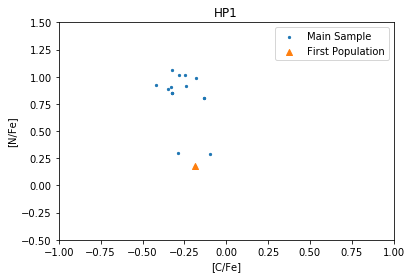

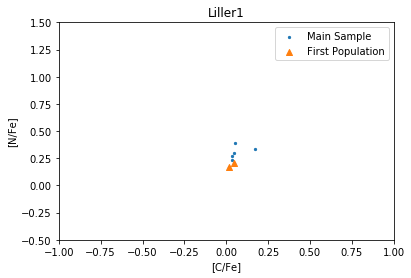

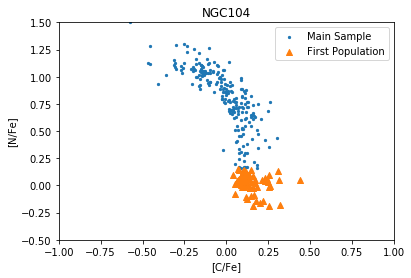

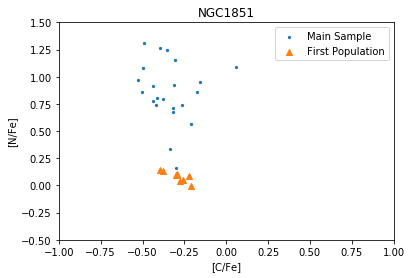

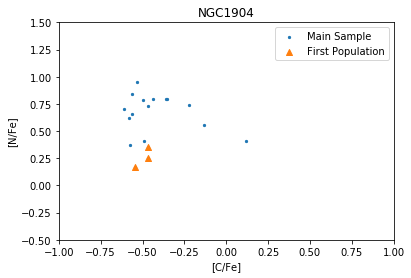

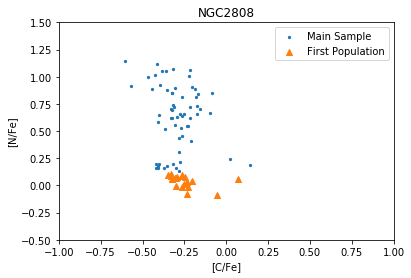

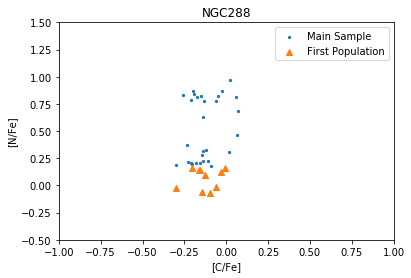

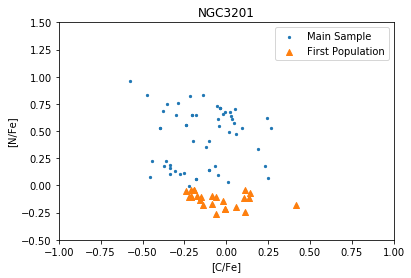

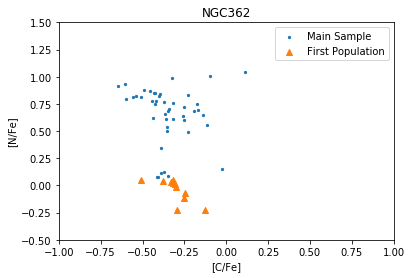

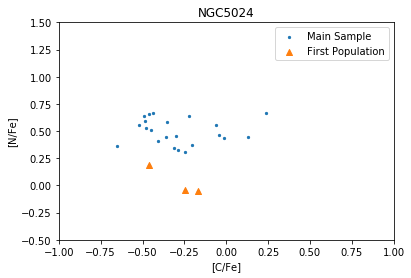

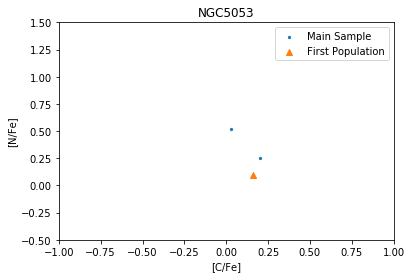

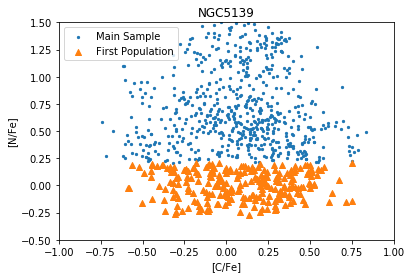

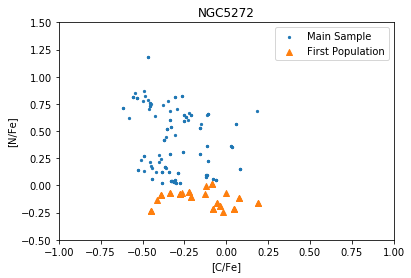

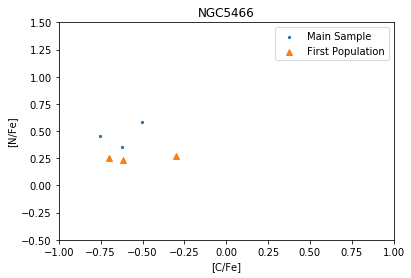

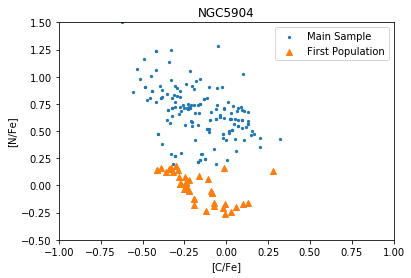

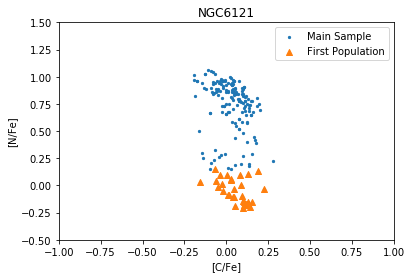

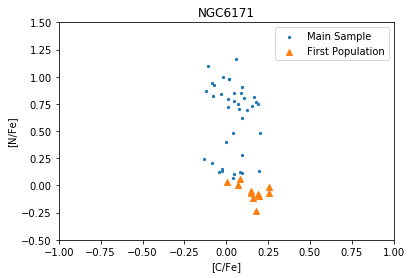

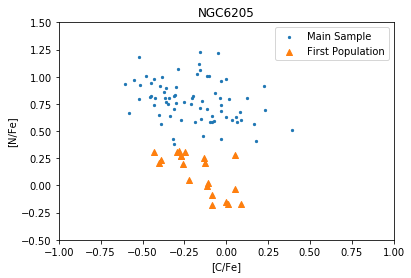

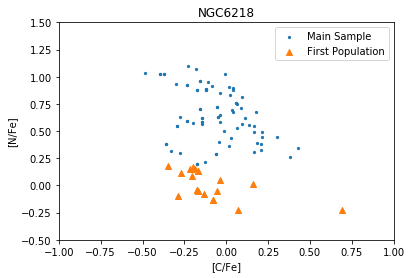

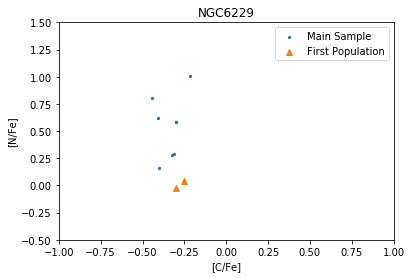

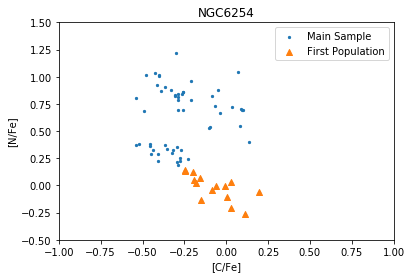

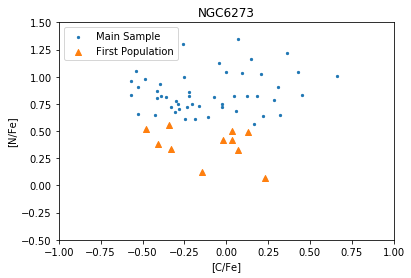

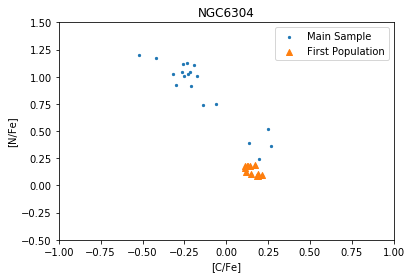

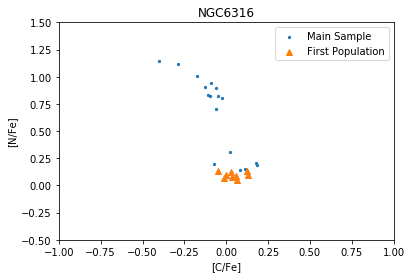

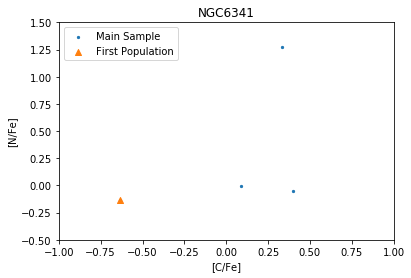

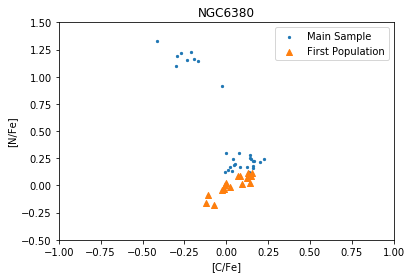

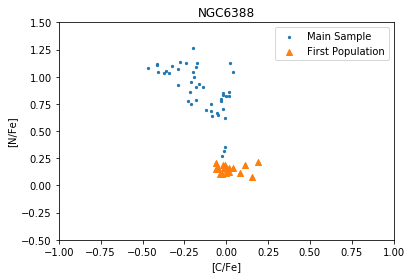

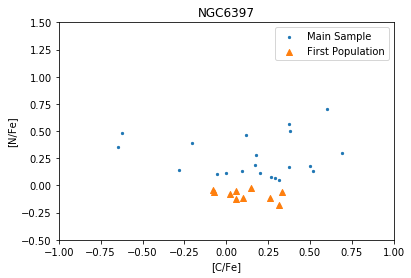

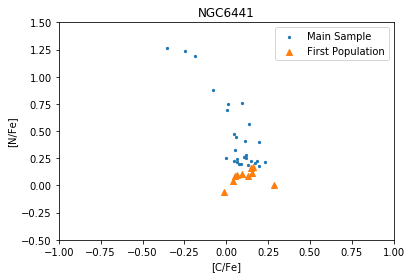

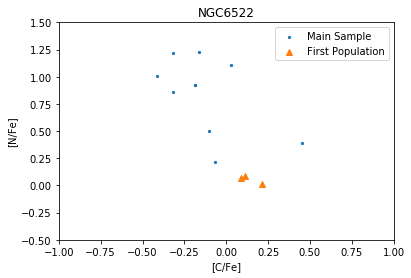

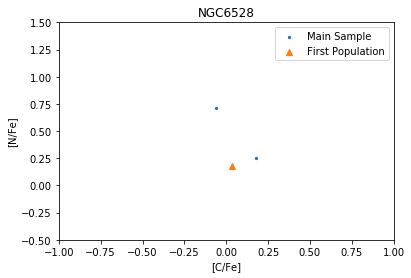

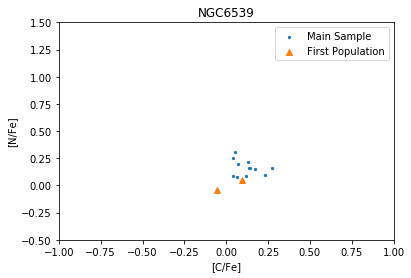

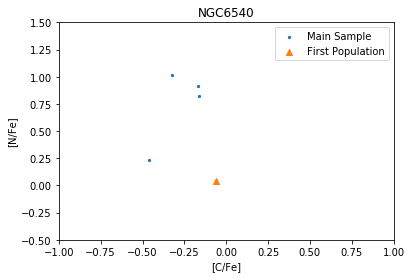

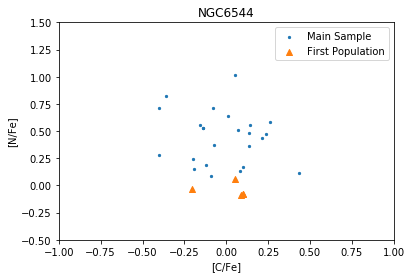

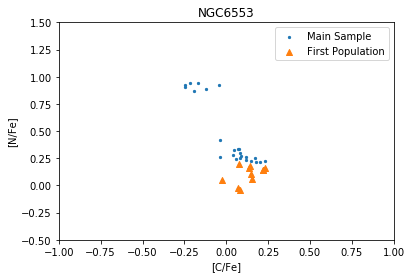

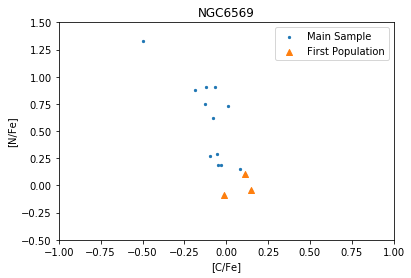

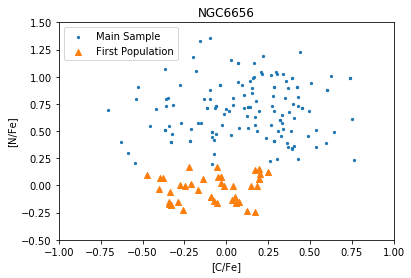

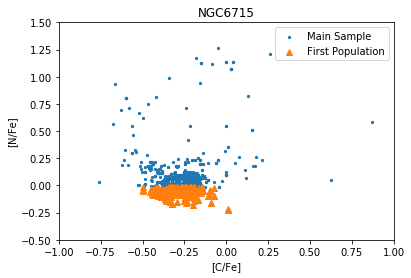

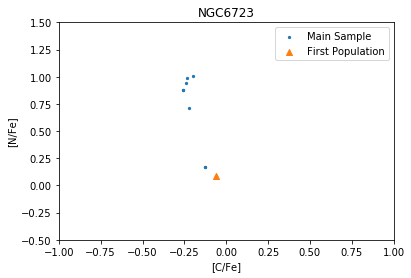

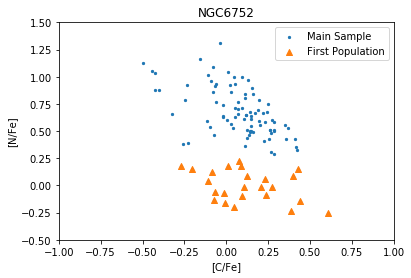

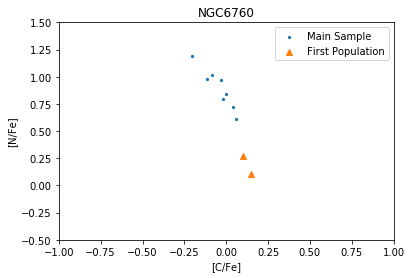

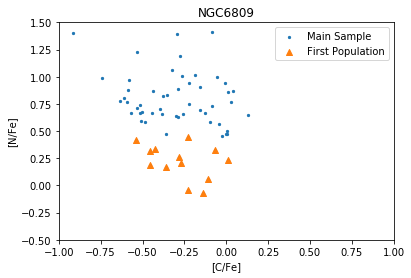

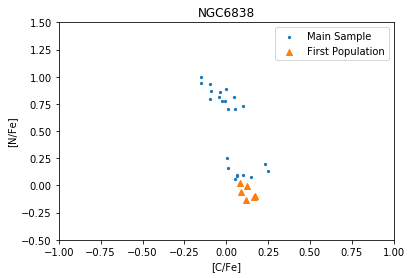

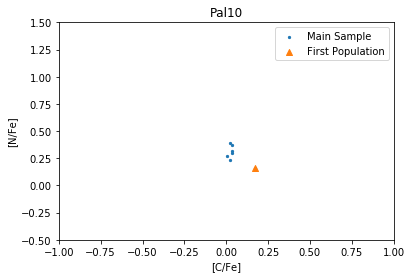

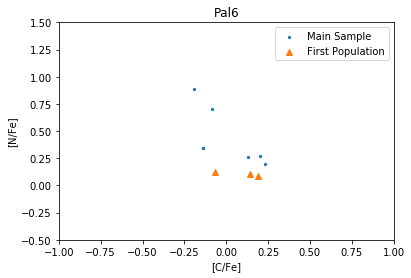

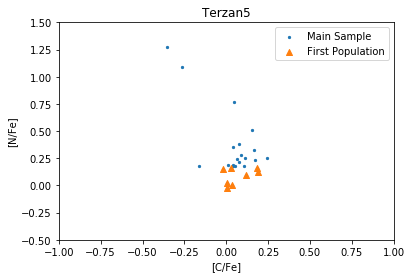

In [12]:
# loop through our sample and find the 1P GC stars
for i in names_unique:
    if i in names:
#         mask the bad N and C values out
        data = data[(data['N_FE']>-10)&(data['C_FE']>-10)]
#         get the N, C, Mg and Al values for each star
        nfes = data['N_FE']
        cfes = data['C_FE']
        mgfes = data['MG_FE']
        alfes = data['AL_FE']
        gcname = data['GC_NAME']
#         find the stars associated with that GC
        nfes = nfes[np.where(data['GC_NAME']==i)]
        cfes = cfes[np.where(data['GC_NAME']==i)]
        mgfes = mgfes[np.where(data['GC_NAME']==i)]
        alfes = alfes[np.where(data['GC_NAME']==i)]
        gcname = gcname[np.where(data['GC_NAME']==i)]
#         in the N-C distribution, find the mean N of the stars associated with each GC
        mean_nfe = np.mean(nfes)
#         select only those GC stars which have N values below the mean
        nfes_low = nfes[nfes<mean_nfe]
        cfes_low = cfes[nfes<mean_nfe]
        mgfes_low = mgfes[nfes<mean_nfe]
        alfes_low = alfes[nfes<mean_nfe]
        gcname_low = gcname[nfes<mean_nfe]
#       calculate the second mean and get the bottom fourth
        mean_nfe2 = np.mean(nfes_low)
#         select only those GC stars in the bottom fourth of the N distribution (i.e. First population GC stars)
        nfes_lowlow = nfes_low[nfes_low<mean_nfe2]
        cfes_lowlow = cfes_low[nfes_low<mean_nfe2]
        mgfes_lowlow = mgfes_low[nfes_low<mean_nfe2]
        alfes_lowlow = alfes_low[nfes_low<mean_nfe2]
        gcname_lowlow = gcname_low[nfes_low<mean_nfe2]
#         if it has a reliable C value, plot the N-C distribution
        if len(cfes_lowlow)>0:
            plt.title(gcname_lowlow[0])
            plt.scatter(cfes,nfes,s=5,label='Main Sample')
            plt.scatter(cfes_lowlow,nfes_lowlow,marker='^',label='First Population')
            plt.legend()
            plt.xlim(-1,1)
            plt.ylim(-0.5,1.5)
            plt.ylabel('[N/Fe]')
            plt.xlabel('[C/Fe]')
            plt.show()
        else:
            pass
    else:
        pass

# See if the N-C selection maps out in other GC light element variation chemical compositions (i.e. Mg-Al)

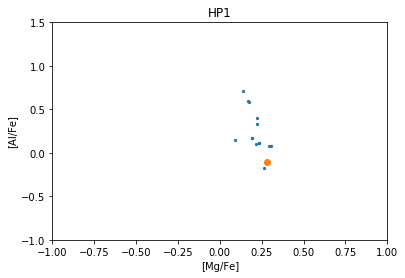

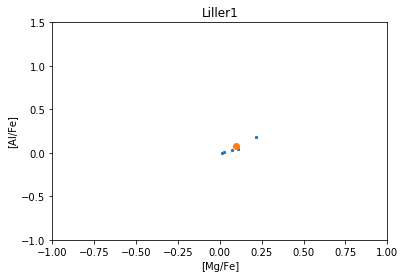

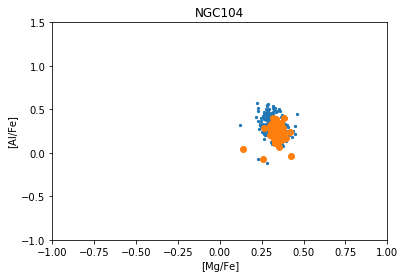

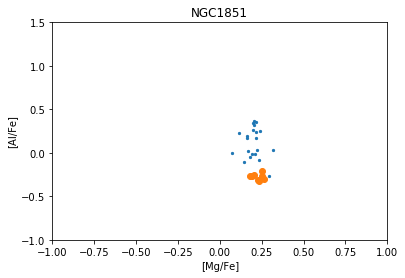

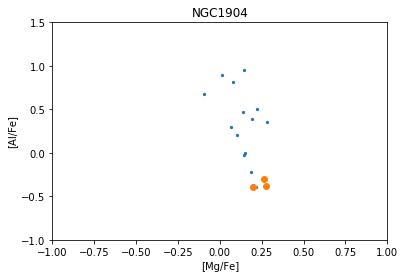

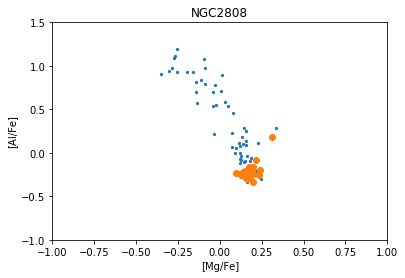

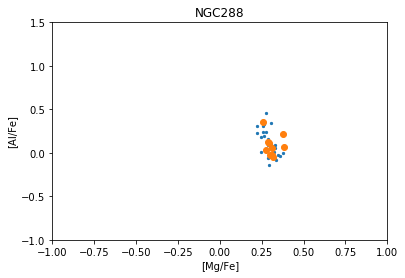

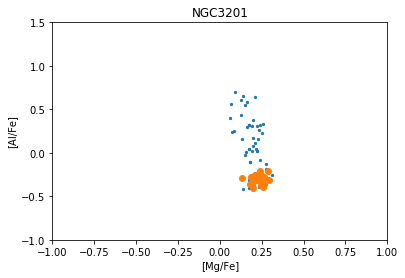

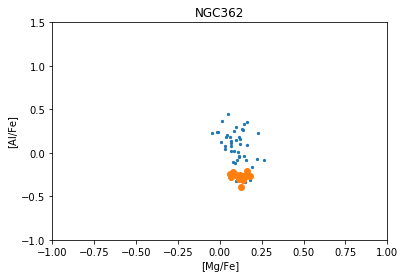

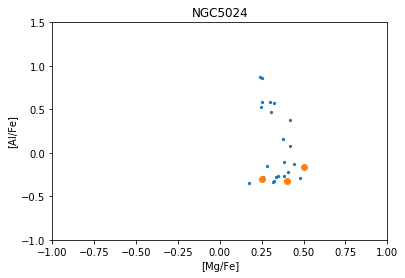

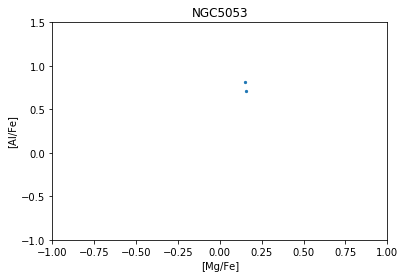

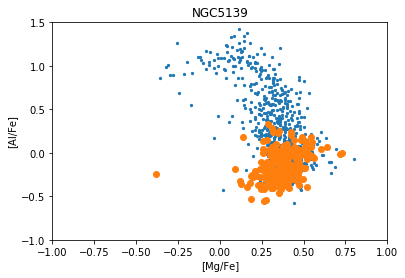

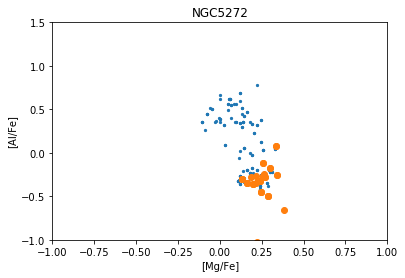

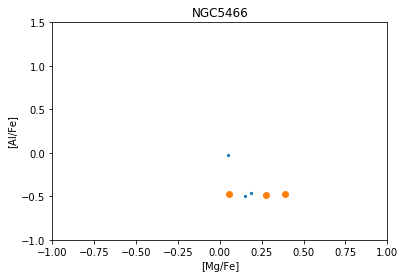

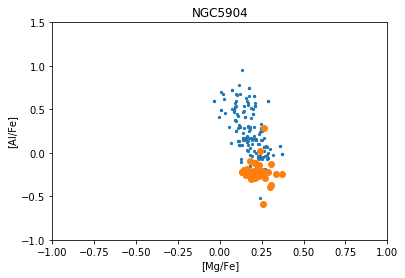

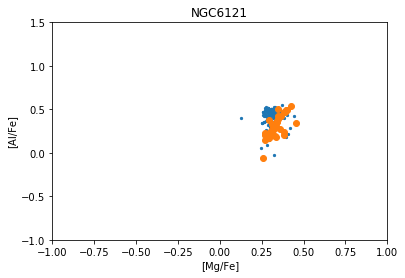

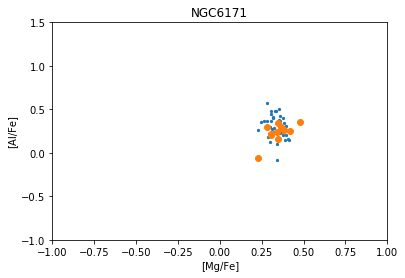

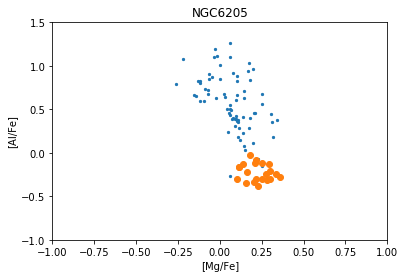

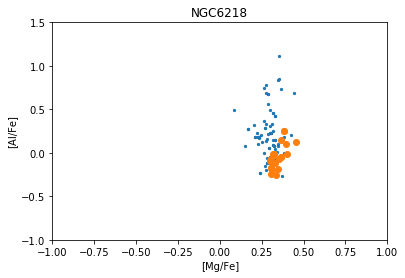

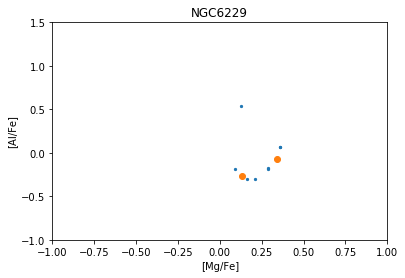

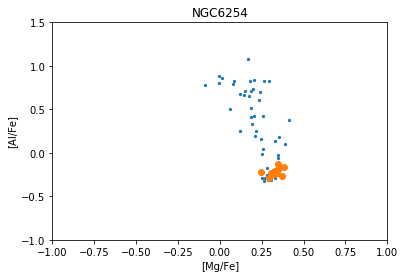

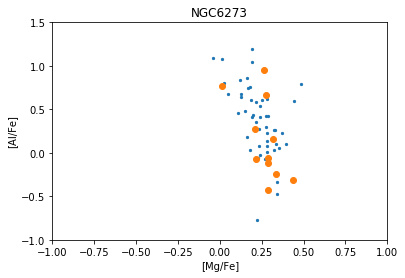

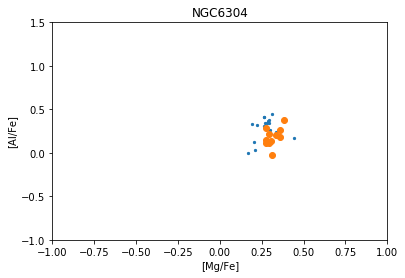

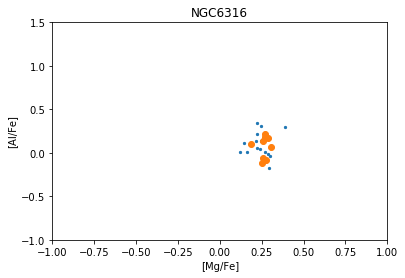

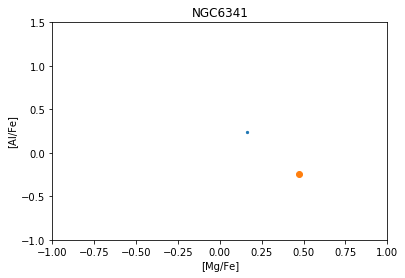

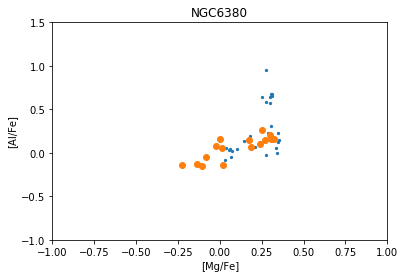

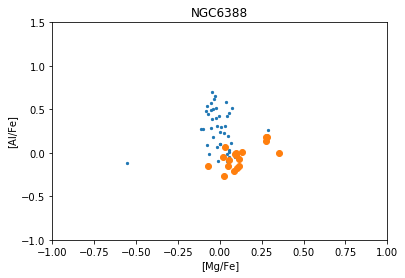

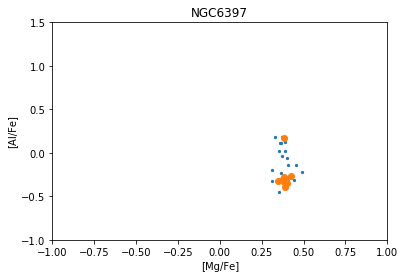

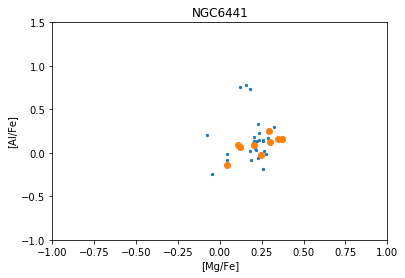

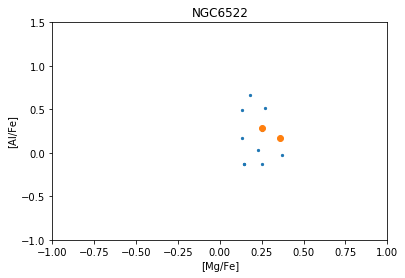

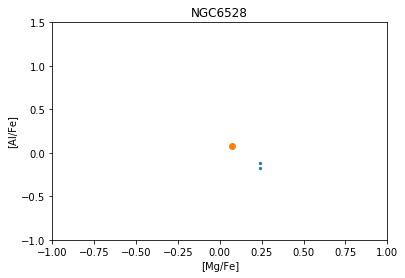

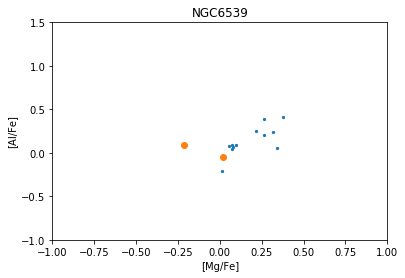

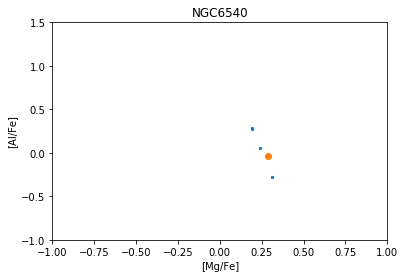

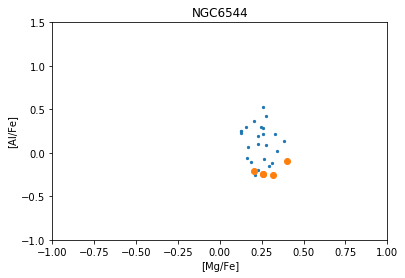

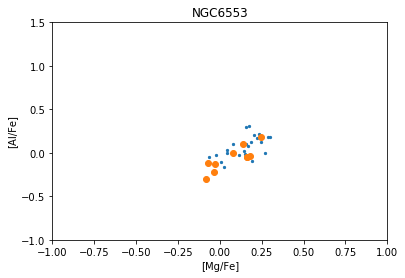

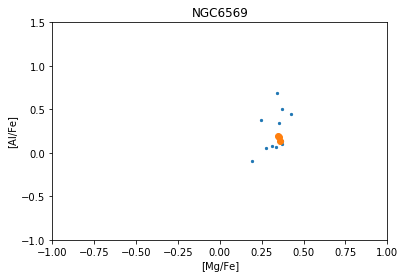

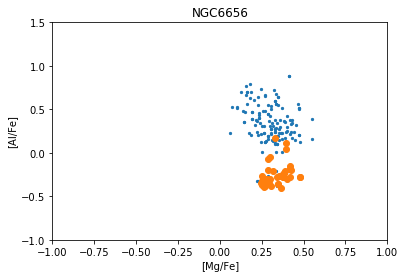

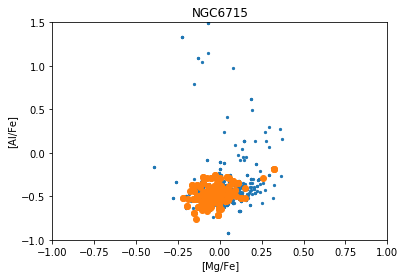

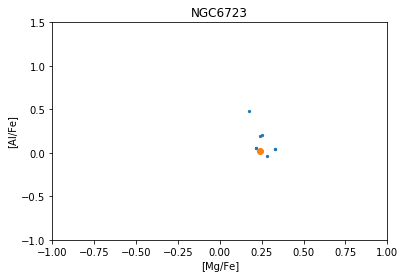

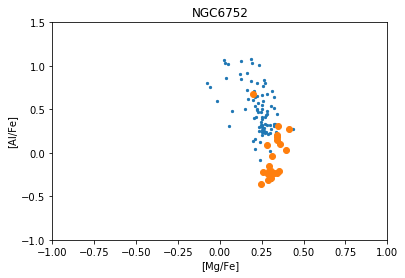

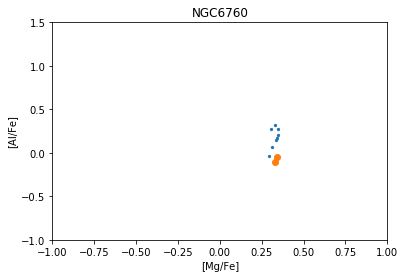

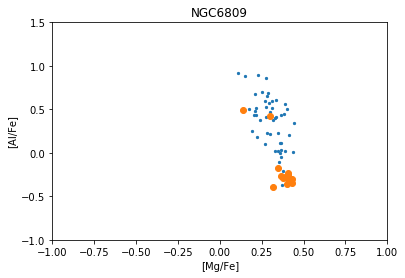

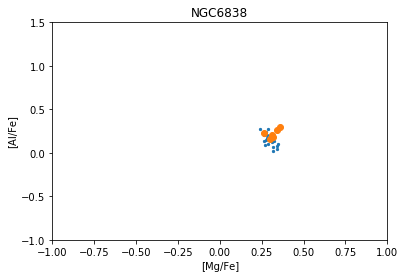

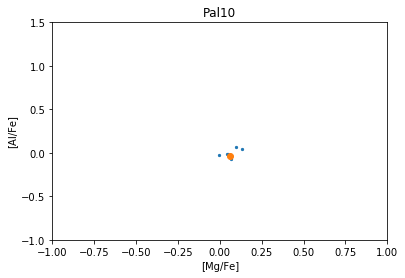

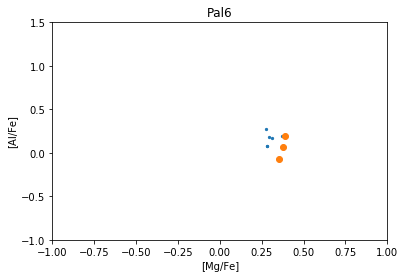

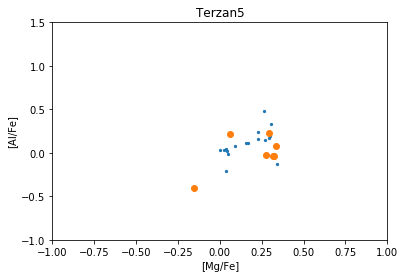

In [21]:
for i in names_unique:
    if i in names:
#         mask the bad N and C values out
        data = data[(data['N_FE']>-10)&(data['C_FE']>-10)]
#         get the N, C, Mg and Al values for each star
        nfes = data['N_FE']
        cfes = data['C_FE']
        mgfes = data['MG_FE']
        alfes = data['AL_FE']
        gcname = data['GC_NAME']
#         find the stars associated with that GC
        nfes = nfes[np.where(data['GC_NAME']==i)]
        cfes = cfes[np.where(data['GC_NAME']==i)]
        mgfes = mgfes[np.where(data['GC_NAME']==i)]
        alfes = alfes[np.where(data['GC_NAME']==i)]
        gcname = gcname[np.where(data['GC_NAME']==i)]
#         in the N-C distribution, find the mean N of the stars associated with each GC
        mean_nfe = np.mean(nfes)
#         select only those GC stars which have N values below the mean
        nfes_low = nfes[nfes<mean_nfe]
        cfes_low = cfes[nfes<mean_nfe]
        mgfes_low = mgfes[nfes<mean_nfe]
        alfes_low = alfes[nfes<mean_nfe]
        gcname_low = gcname[nfes<mean_nfe]
#       calculate the second mean and get the bottom fourth
        mean_nfe2 = np.mean(nfes_low)
#         select only those GC stars in the bottom fourth of the N distribution (i.e. First population GC stars)
        nfes_lowlow = nfes_low[nfes_low<mean_nfe2]
        cfes_lowlow = cfes_low[nfes_low<mean_nfe2]
        mgfes_lowlow = mgfes_low[nfes_low<mean_nfe2]
        alfes_lowlow = alfes_low[nfes_low<mean_nfe2]
        gcname_lowlow = gcname_low[nfes_low<mean_nfe2]
#         if it has a reliable C value, plot the N-C distribution
        if len(cfes_lowlow)>0:
            plt.title(gcname_lowlow[0])
            plt.scatter(mgfes,alfes,s=5)
            plt.scatter(mgfes_lowlow,alfes_lowlow)
            plt.xlim(-1,1)
            plt.ylim(-1,1.5)
            plt.xlabel('[Mg/Fe]')
            plt.ylabel('[Al/Fe]')
            plt.show()
        else:
            pass
    else:
        pass



# As we see, this method is accurate at determining first population stars in our GC samples. Thus we will use this method to then identify the FP stars and save them as a separate data file

In [16]:
# check the stars in the Teff vs logg plane
for i in tqdm.tqdm_notebook(names_unique):
    if i in names:
#         mask the bad N and C values out
        data = data[(data['N_FE']>-10)&(data['C_FE']>-10)]
#         get the N, C, Mg and Al values for each star
        nfes = data['N_FE']
        cfes = data['C_FE']
        mgfes = data['MG_FE']
        alfes = data['AL_FE']
        gcname = data['GC_NAME']
        apo_ids = data['APOGEE_ID']
#         find the stars associated with that GC
        nfes = nfes[np.where(data['GC_NAME']==i)]
        cfes = cfes[np.where(data['GC_NAME']==i)]
        mgfes = mgfes[np.where(data['GC_NAME']==i)]
        alfes = alfes[np.where(data['GC_NAME']==i)]
        gcname = gcname[np.where(data['GC_NAME']==i)]
        apo_ids = apo_ids[np.where(data['GC_NAME']==i)]
#         in the N-C distribution, find the mean N of the stars associated with each GC
        mean_nfe = np.mean(nfes)
#         select only those GC stars which have N values below the mean
        nfes_low = nfes[nfes<mean_nfe]
        cfes_low = cfes[nfes<mean_nfe]
        mgfes_low = mgfes[nfes<mean_nfe]
        alfes_low = alfes[nfes<mean_nfe]
        gcname_low = gcname[nfes<mean_nfe]
        apo_ids_low = apo_ids[nfes<mean_nfe]
#       calculate the second mean and get the bottom fourth
        mean_nfe2 = np.mean(nfes_low)
#         select only those GC stars in the bottom fourth of the N distribution (i.e. First population GC stars)
        nfes_lowlow = nfes_low[nfes_low<mean_nfe2]
        cfes_lowlow = cfes_low[nfes_low<mean_nfe2]
        mgfes_lowlow = mgfes_low[nfes_low<mean_nfe2]
        alfes_lowlow = alfes_low[nfes_low<mean_nfe2]
        gcname_lowlow = gcname_low[nfes_low<mean_nfe2]
        apo_ids_lowlow = apo_ids_low[nfes_low<mean_nfe2]
#         if it has a reliable C value, plot the N-C distribution
        if len(cfes_lowlow)>0:
#         save the ids
            savepath = '/Users/danny/Desktop/apogee-gc/dr17/first_pop/'
            rec = np.recarray(len(apo_ids_lowlow), dtype=[('apogee_id',object),
                                        ('name', object)])
            rec['apogee_id'] = apo_ids_lowlow
            rec['name'] = gcname_lowlow
            np.savetxt(savepath+i+'.txt',rec,fmt='%s')
        else:
            pass
    else:
        pass

/Users/danny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [17]:
# save the 1P sample
import glob
import sys
files = glob.glob(savepath+"*.txt")
# print(np.shape(files))

merged=[]
for i in files:
    file = np.array(np.loadtxt(i,dtype='str'))
    merged.extend(file)

In [20]:
# save the full 1P sample together
print('There are '+str(len(merged))+' First population GC stars in the GC catalogue')
np.savetxt(savepath+'combined.txt',merged,fmt='%s')

There are 1069 First population GC stars in the GC catalogue
